# Problem Statement
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

###### Link for Datasets :
https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

# Exploratory Data Analysis
We are going to do some EDA for getting some insights of data.


## In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [5]:
## Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)

In [6]:
## read the csv file 
data = pd.read_csv('cubic_zirconia.csv')

In [7]:
## Let's check the top of datasets
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


###### We can see this unnamed column is just indexing so we can remove it later.

In [8]:
## Let's check the size of datasets
data.shape

(26967, 11)

In [9]:
type(data.iloc[:,1])

pandas.core.series.Series

###### Shape of our datasets is 26967 rows and 11 columns. Here, Price is our dependent variable(target value) which we have to predict and other columns are independent varaiable.

In [10]:
## Let's see info about our dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


###### As we can see from above only depth has null values. 

In [11]:
## Let's drop the useless unnamed column from datasets.
data.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
## Now, Let's see the columns of datasets
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [13]:
## Here each columns have some meaning like which column represent which values let's see it.
column_meaning = pd.read_excel('Data Dictionary.xlsx')

## Let's see meaning of each columns.
column_meaning

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [14]:
## Let's see overall statical values of datasets
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [15]:
## Let's see statical values of categorical variable.
data.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


###### As we can see that the min values of x,y,z are 0 which means it must be faulty values because diamonds are not dimensionless or of zero height diamond is a 3-D object. So, all three x,y,z can't be zero.

In [16]:
## Let's check no of values whose x==0.
(data.x==0).sum()

3

In [17]:
## Let's check no of values whose y==0.
(data.y==0).sum()

3

In [18]:
## Let's check no of values whose z==0.
(data.z==0).sum()

9

###### Hence, there are 3 x-values, 3 y-values and 9 z-values . We have to drop these values.

In [19]:
## Let's drop those zeros values of x,y and z.
data.drop(data[data['x']==0].index,inplace=True)
data.drop(data[data['y']==0].index,inplace=True)
data.drop(data[data['z']==0].index,inplace=True)


In [20]:
## Now, Let's check the size of datasets
data.shape

(26958, 10)

###### Let's check and deal with duplicated values.

In [21]:
## Let's check for the duplicate values.
data.duplicated().sum()

33

In [22]:
## Hence,Let's drop the duplicated values.
data.drop_duplicates(inplace=True)

###### Let's check and deal with missing values.

<AxesSubplot:>

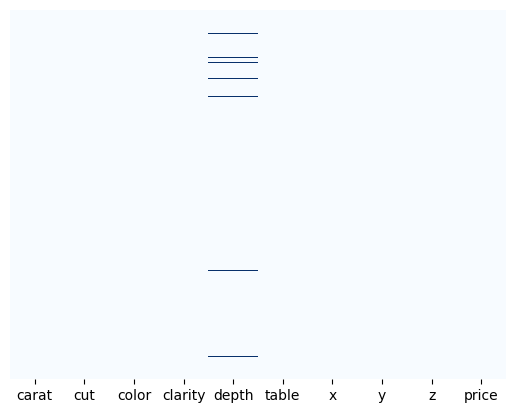

In [23]:
## Let's visualize through heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [24]:
## Let's check for null values.
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

###### Hence, Only depth has null values let's replace it with mean values.

In [25]:
data.fillna(data.depth.mean(),inplace=True)

# Let's check for Outliners.

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


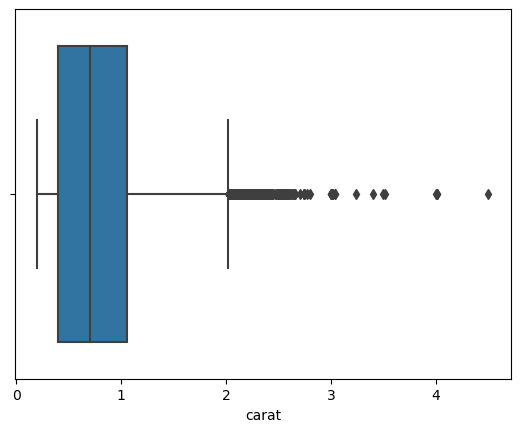

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


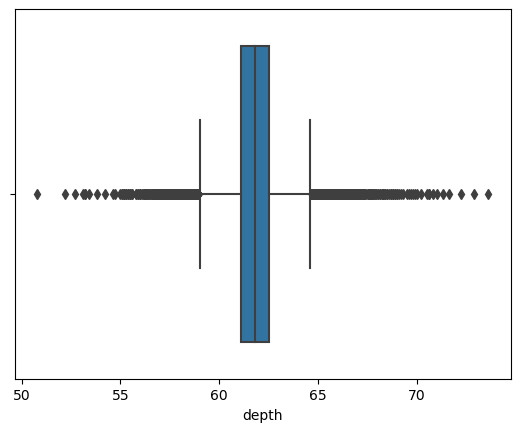

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


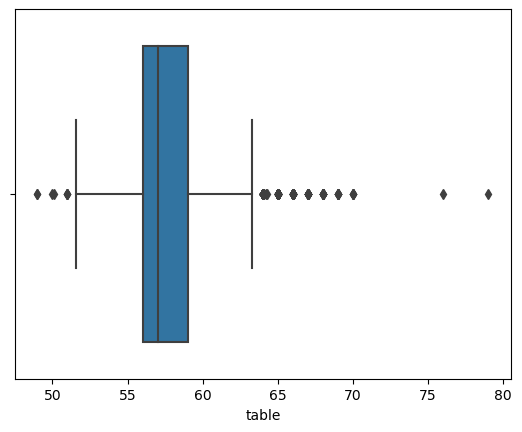

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


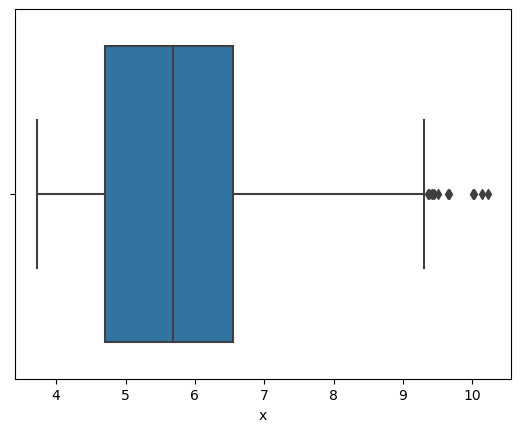

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


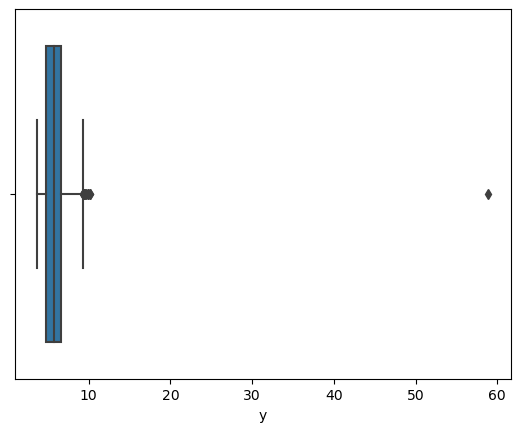

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


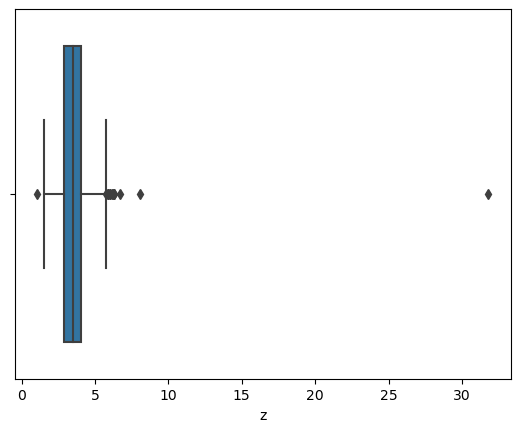

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


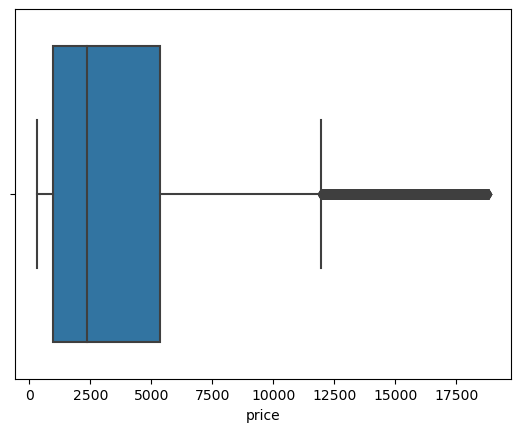

In [26]:
continuous_features = [column for column in data.columns if data[column].dtype!='O']

for feature in continuous_features:
    dataset = data.copy()
    sns.boxplot(dataset[feature])
    plt.show()

###### From the above graph we can say that this datasets have a lot of outliers.So, we have to deal with it.
###### There are various ways for detecting the Outliers :
1. Mean and Standard Deviation Method
2. Inter Quartile Range
3. Z-score
4. Percentile Calculation

###### We are going to use Mean and Standard Deviation Method for detecting Outiers.

In [27]:
## Let's make a function for detecting outliners because it will be difficult to find oulliers for every columns. so ,we just apply same function to each column.

def detect_outliers(column):
    mean = np.mean(column)
    std = np.std(column)
    
    ## Now, find the data that are three standard deviations above the mean:
    upper_range = mean + 3*std
    
    ## Here we find out the data that are three standard deviations below the mean:
    lower_range = mean - 3*std
    
    return lower_range,upper_range

In [28]:
## Let's remove outiners by applying function to every columns.
for column in data[continuous_features].columns:
    lower_range,upper_range=detect_outliers(data[column])
    data[column]=np.where(data[column]>upper_range,upper_range,data[column])
    data[column]=np.where(data[column]<lower_range,lower_range,data[column])

###### Let's check the Outliers it is removed or not.

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


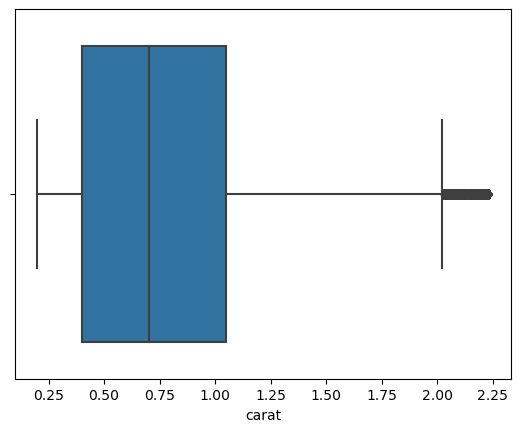

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


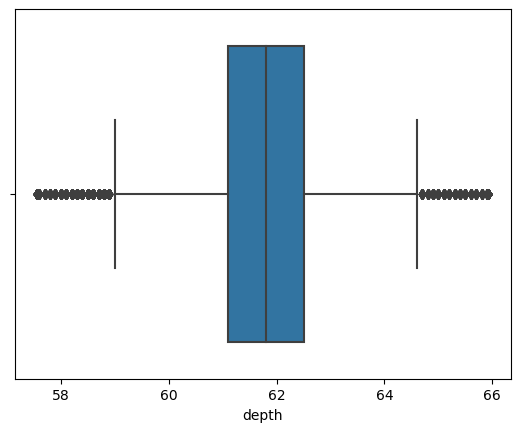

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


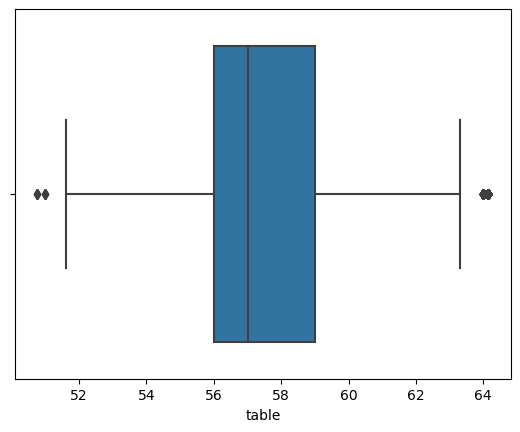

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


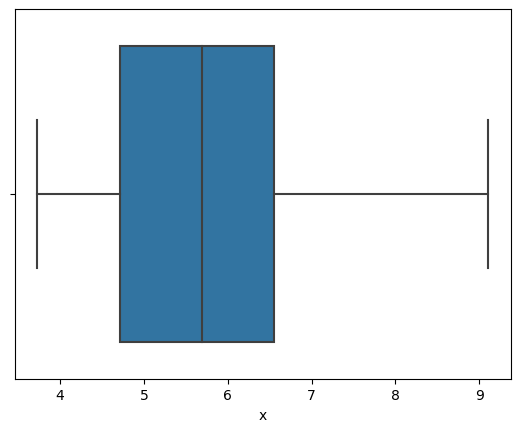

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


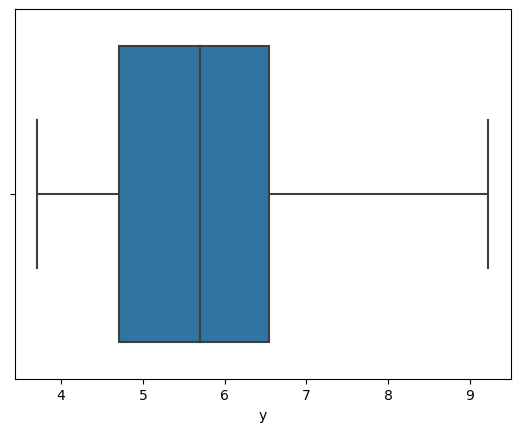

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


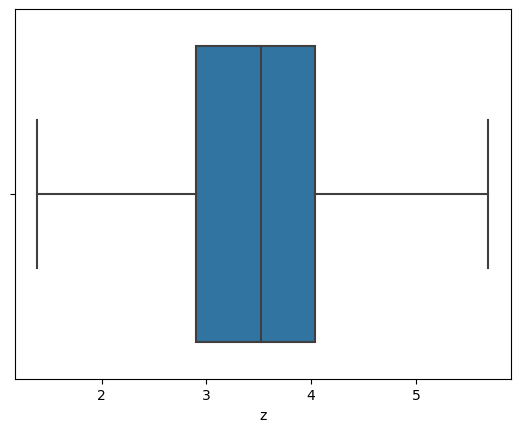

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


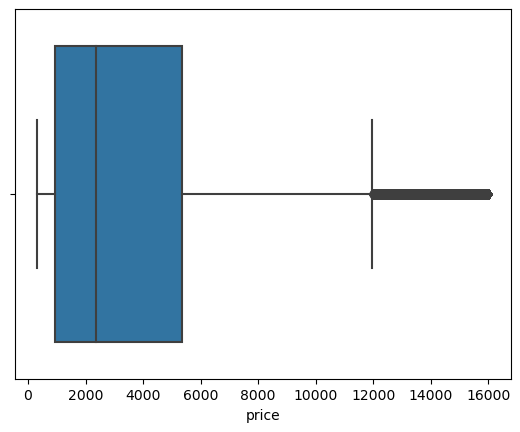

In [29]:
for feature in continuous_features:
    dataset = data.copy()
    sns.boxplot(dataset[feature])
    plt.show()

# Univariate Analysis

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

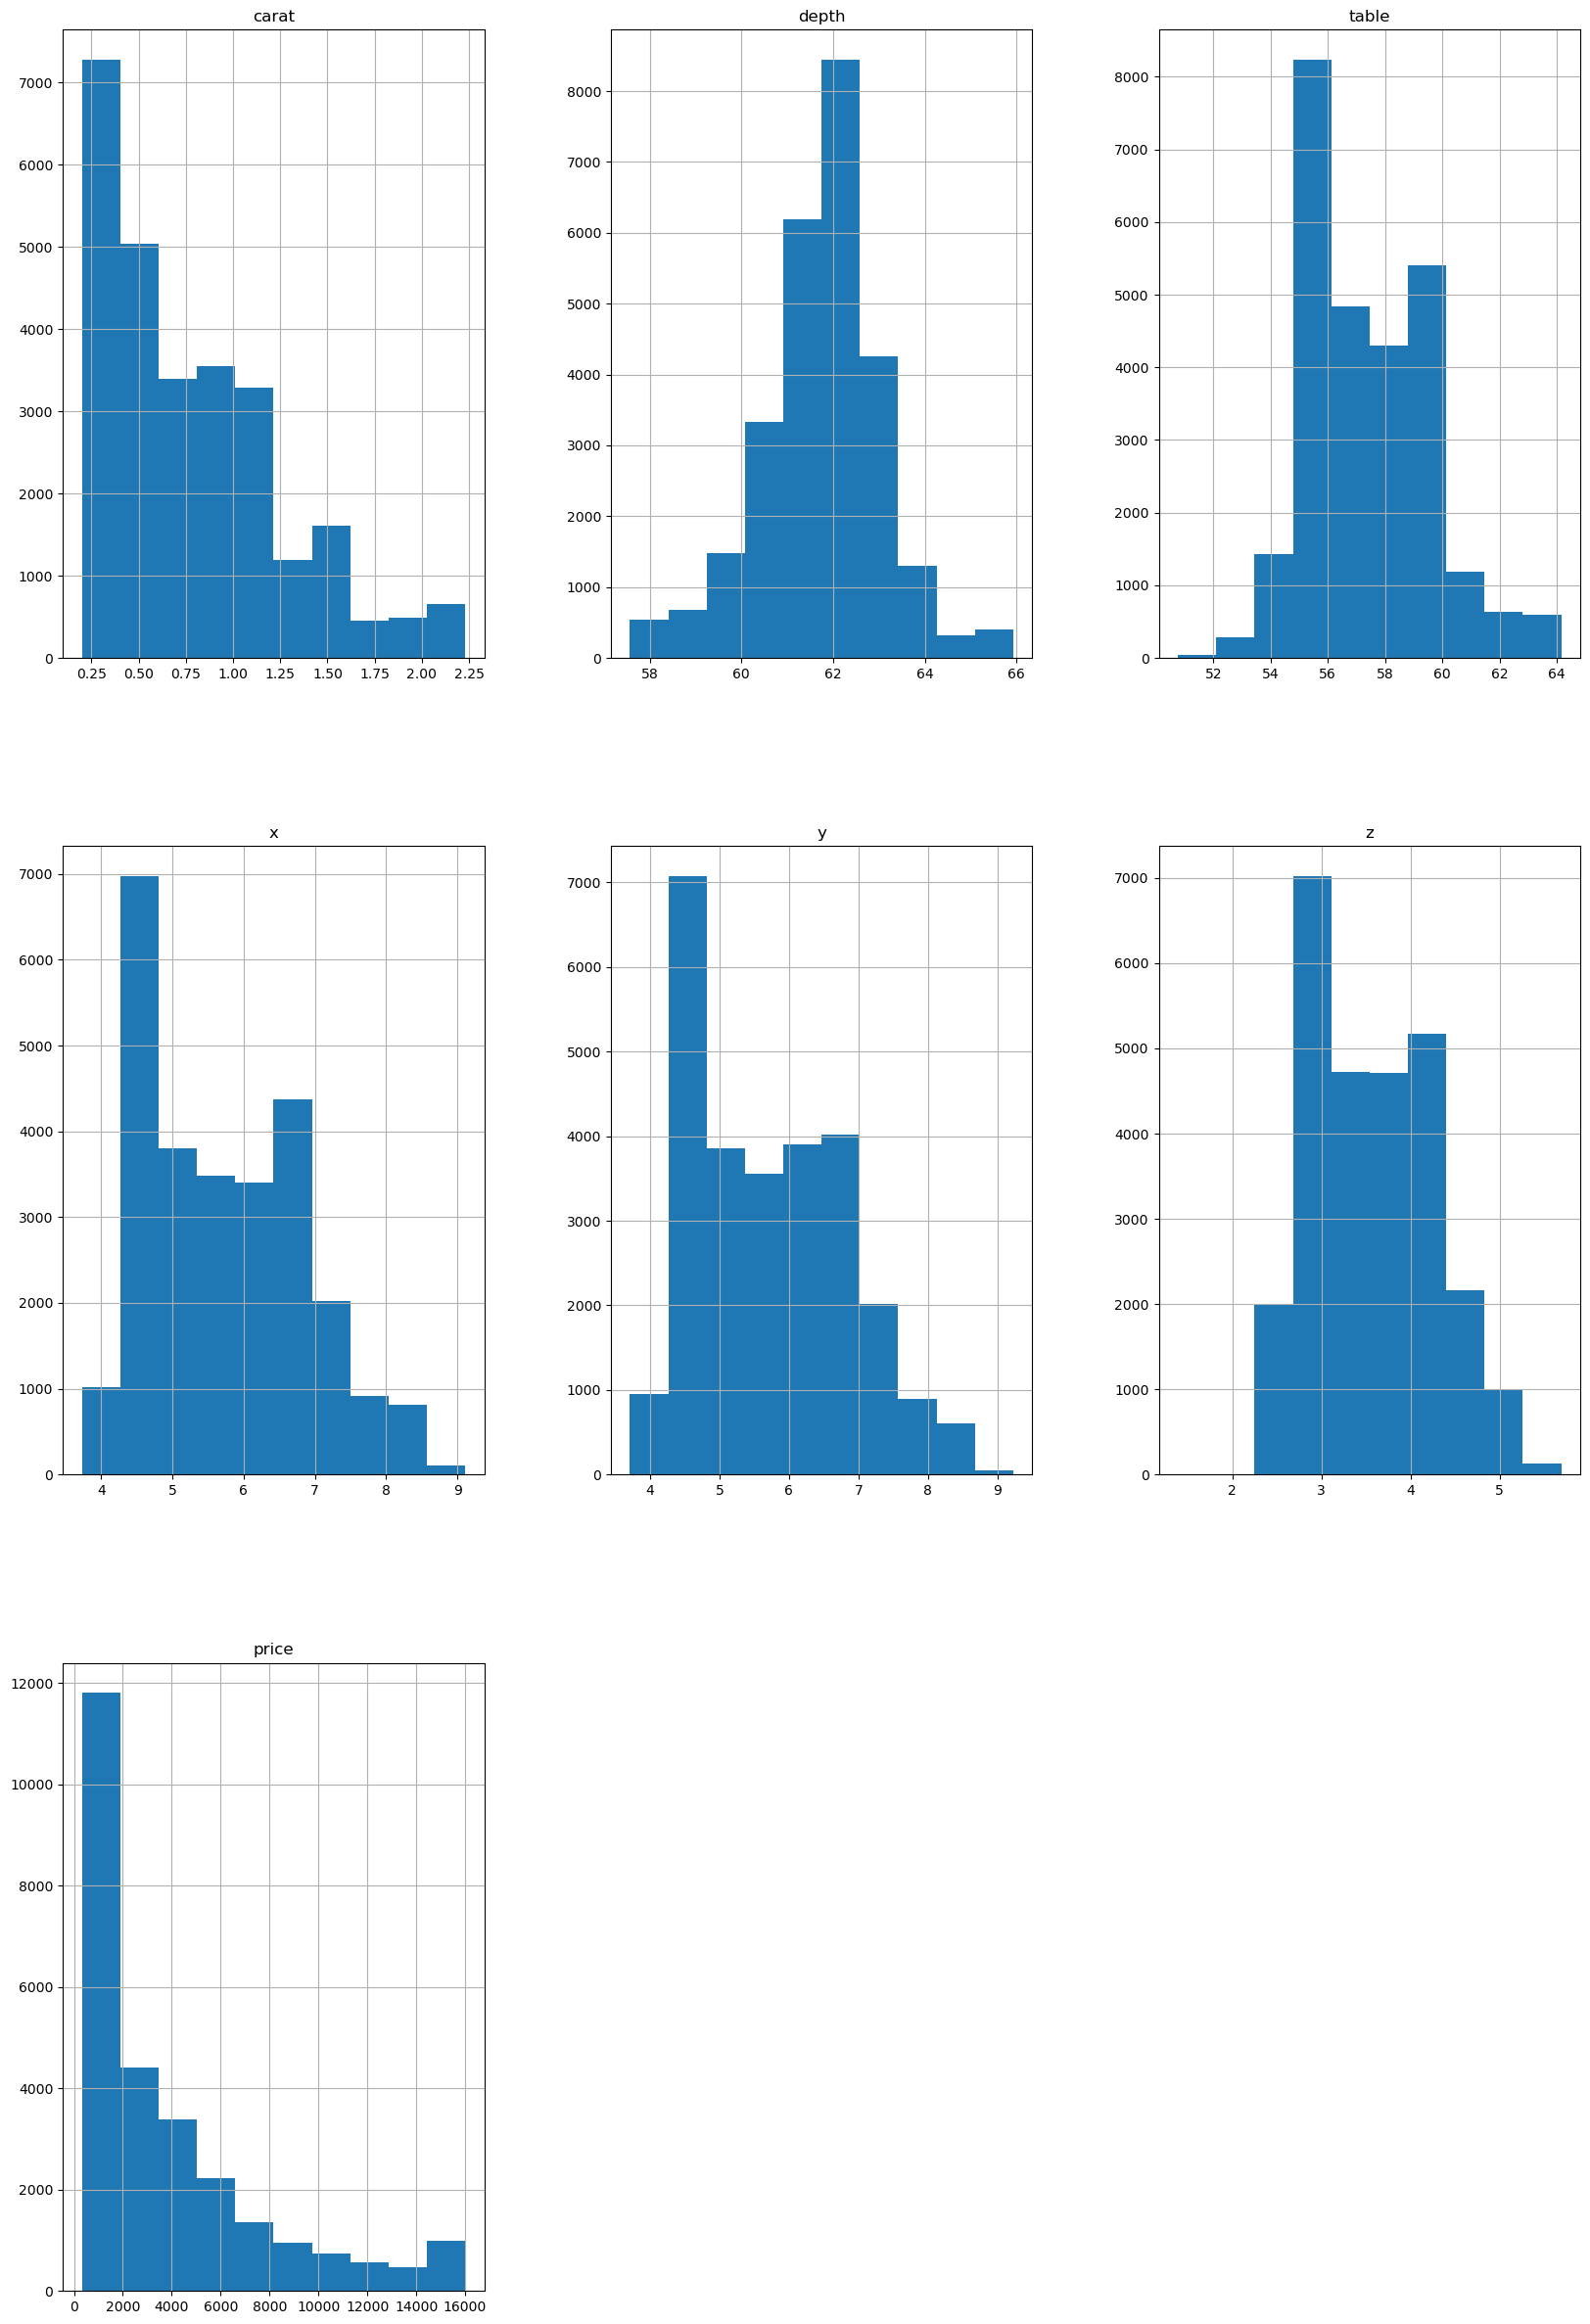

In [30]:
data.hist(figsize=(20,30))

#  Bivariate Analysis

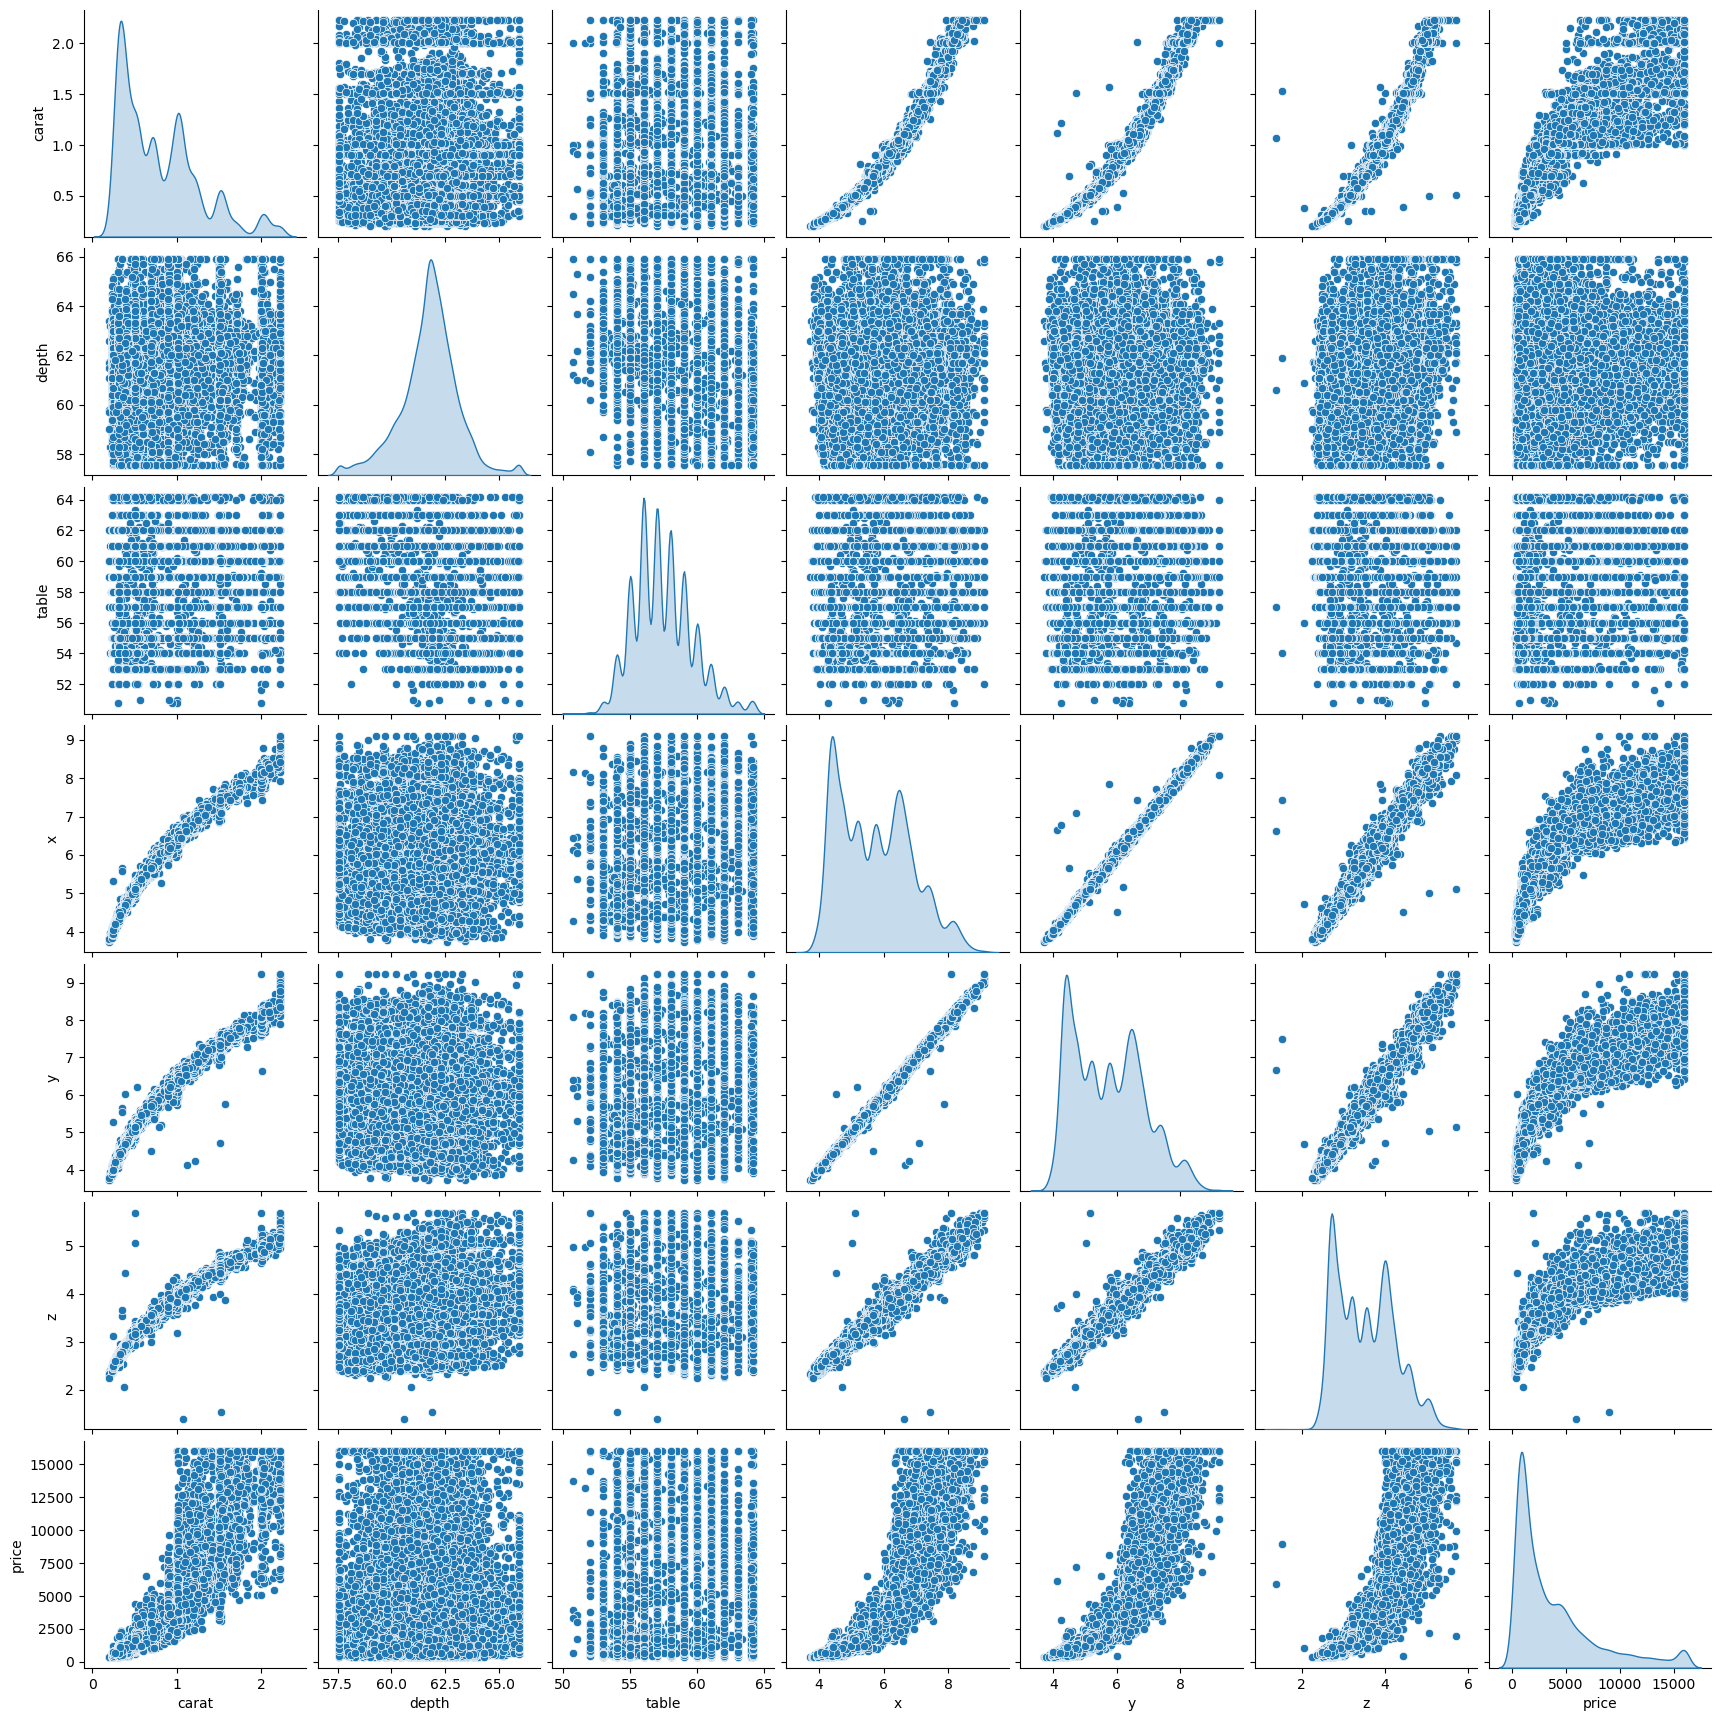

In [31]:
sns.pairplot(data,diag_kind='kde')
plt.show()

# Correlation
###### Let's find out correlation between dependent and independent features.

<AxesSubplot:>

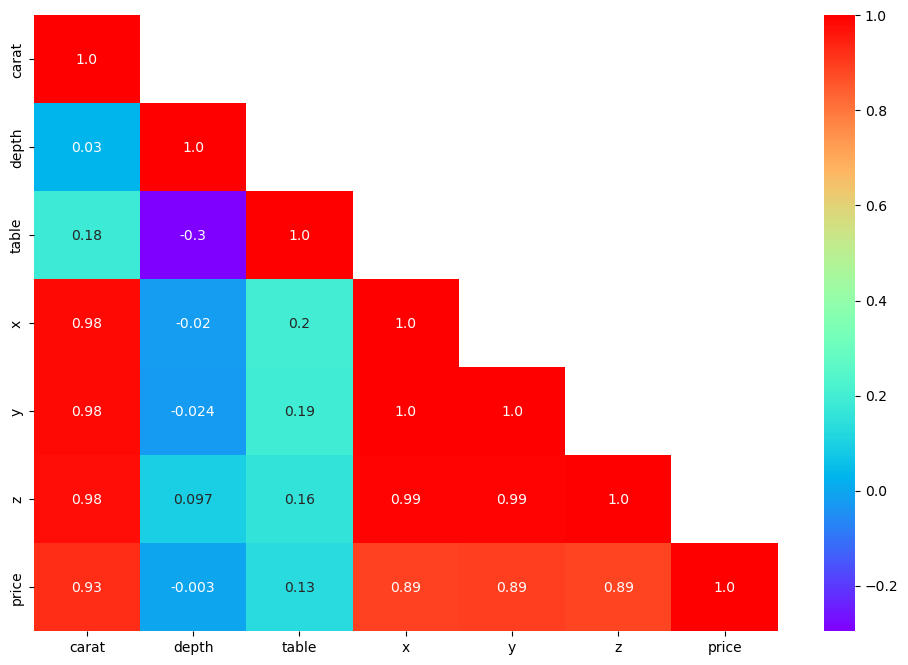

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow',fmt='0.2',cbar=True,mask=np.triu(data.corr(),+1))

In [33]:
## Let's see correlation between the datasets
data.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.030490,0.184903,0.980961,0.979996,0.979031,0.928255
depth,0.030490,1.000000,-0.295783,-0.020412,-0.023737,0.096681,-0.003009
table,0.184903,-0.295783,1.000000,0.199104,0.193369,0.159701,0.130999
x,0.980961,-0.020412,0.199104,1.000000,0.998487,0.990958,0.893405
y,0.979996,-0.023737,0.193369,0.998487,1.000000,0.990590,0.894902
z,0.979031,0.096681,0.159701,0.990958,0.990590,1.000000,0.888397
price,0.928255,-0.003009,0.130999,0.893405,0.894902,0.888397,1.000000


In [34]:
## Let's observe the price correlated with
data.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.928255
y        0.894902
x        0.893405
z        0.888397
table    0.130999
depth   -0.003009
Name: price, dtype: float64

# Observation:
###### From the observation from correaltion we can say that depth has negligible correlation with price.Hence, we can consider 5 columns which are ['carat','table','x','y','z'].

# Feature Engineering

In [35]:
data.head().style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.300000,Ideal,E,SI1,62.100000,58.000000,4.270000,4.290000,2.660000,499.000000
1,0.330000,Premium,G,IF,60.800000,58.000000,4.420000,4.460000,2.700000,984.000000
2,0.900000,Very Good,E,VVS2,62.200000,60.000000,6.040000,6.120000,3.780000,6289.000000
3,0.420000,Ideal,F,VS1,61.600000,56.000000,4.820000,4.800000,2.960000,1082.000000
4,0.310000,Ideal,F,VVS1,60.400000,59.000000,4.350000,4.430000,2.650000,779.000000


In [36]:
data.cut.value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [37]:
## Let's create dummy values for cut.
Cut = pd.get_dummies(data['cut'],drop_first=True)

In [38]:
Cut.head()

,Good,Ideal,Premium,Very Good
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [39]:
## Now Let's merge both dataframe and drop the cut column
data = pd.concat([data,Cut],axis=1)

In [40]:
data.color.value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [41]:
## Let's create dummy values for cut.
Color = pd.get_dummies(data['color'],drop_first=True)

In [42]:
## Now Let's merge both dataframe and drop the cut column
data = pd.concat([data,Color],axis=1)

In [43]:
data.clarity.value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [44]:
## Let's create dummy values for cut.
Clarity = pd.get_dummies(data['clarity'],drop_first=True)

In [45]:
## Now Let's merge both dataframe and drop the cut column
data = pd.concat([data,Clarity],axis=1)

In [46]:
## Let's drop those column
data.drop(['clarity','color','cut'],axis=1,inplace=True)

In [47]:
## Now, Let's see our datasets after Feature Engineering 
data.head()

,carat,depth,table,x,y,z,price,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# Feature Scaling :
###### We are going to use standarization 

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
x=data.drop('price',axis=1)
y=data['price']

In [50]:
scale = StandardScaler()

In [51]:
x_scale = scale.fit_transform(x)

In [52]:
x_scale

array([[-1.05563386,  0.26998893,  0.25652026, ..., -0.54075935,
        -0.27075417, -0.32204002],
       [-0.99176735, -0.70891054,  0.25652026, ..., -0.54075935,
        -0.27075417, -0.32204002],
       [ 0.22169626,  0.34528889,  1.17523811, ..., -0.54075935,
        -0.27075417,  3.1052041 ],
       ...,
       [-0.60856832, -0.03121091,  0.25652026, ...,  1.84925141,
        -0.27075417, -0.32204002],
       [-1.11950037,  0.04408905, -0.6621976 , ..., -0.54075935,
        -0.27075417,  3.1052041 ],
       [ 0.9668055 ,  0.19468897,  0.25652026, ..., -0.54075935,
        -0.27075417, -0.32204002]])

# Model Selection

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape,x_test.shape

((21540, 23), (5385, 23))

In [55]:
## Let's try to choose best algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning

In [56]:
## Initiate RandomForestRegressor 

model = RandomForestRegressor()

In [57]:
# Creating Parameter grid for GridSearch CV

params_rf = {
    'n_estimators': [500,1000], # No of trees
    'max_depth': [10,15], # maximum depth to explore
    'min_samples_split':[5], # minimum samples required for split
    'min_samples_leaf':[5], # minimum samples required at leaf
    'max_features': [ 'auto'] # number of features for the best split
}

In [58]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator = model, # regressor we want to use
                       param_grid = params_rf, # Hyperparameter space
                       scoring ='r2', # MSE will be performance metric
                       cv = 3, # No of folds
                       verbose = 1,
                       n_jobs = -1) # use all cores

In [59]:
grid_rf.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'max_features': ['auto'],
                         'min_samples_leaf': [5], 'min_samples_split': [5],
                         'n_estimators': [500, 1000]},
             scoring='r2', verbose=1)

In [60]:
## Store the best model based on r2_score metrics

best_model = grid_rf.best_estimator_
best_model

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=1000)

In [61]:
y_pred = best_model.predict(x_test)

In [62]:
r2_score(y_test,y_pred)

0.9691730350487316

### Now, in order to use this model to predict other unknown data, we need to save it. We can save it by using pickle, which is used for serializing and deserializing a Python object structure.

In [63]:
# pickling the model
import pickle
pickle_out = open("Best_Model.pkl", "wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

### There will be a new file created called “classifier.pkl” in the same directory. Now we can get down to using Streamlit to deploy the model –

In [64]:
import streamlit as st

In [65]:
    carat = st.number_input("Carat", "Type Here")
    cut = st.selectbox("Cut",["Good","Very Good","Ideal","Premium"])
    color = st.selectbox("Color", ["E","F","G","H","I","J"])
    clarity = st.selectbox("Clarity", ["IF","SI1","SI2","VS1","VS2","VVS1","VVS2"])
    table =  st.text_input("Table", "Type Here")
    x = st.text_input("X", "Type Here")
    Y = st.text_input("Y", "Type Here")
    Z = st.text_input("Z", "Type Here")

2023-02-24 14:39:14.726 
  command:

    streamlit run C:\Users\mohan\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
